O dataset utilizado para esse desafio é uma versão modificada do arquivo presente no Kaggle:
https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

O link do arquivo raw que vamos usar (aquele usamos para ler direto do Github) é esse aqui:
https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv

# Leitura dos dados

Se você clicar no link verá que temos um arquivo com 6 colunas, sendo a primeira coluna do arquivo uma coluna de texto e a primeira linha do arquivo também é uma coluna de texto.

Aqui o desafio é ler esse arquivo. Para isso importe a numpy e use a função loadtxt. Use o link da url, o parâmetro usecols para pular a primeira coluna. Você pode usar np.arange para criar a sequência de números que representam as colunas. Por fim, você também deve incluir o parâmetro skiprows=1 para que a primeira linha de texto seja desconsiderada na leitura do arquivo.

In [1]:
import numpy as np
url = 'dados/citrus.csv'
dado = np.loadtxt(url, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)

In [2]:
dado

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

# Seleção de dados

Desses a colunas que iremos avaliar são as de diâmetro e peso. Crie um arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmtro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo.

In [3]:
diametro_laranja = dado[:5000,0]
diametro_toranja = dado[5000:,0]
peso_laranja = dado[:5000,1]
peso_toranja = dado[5000:,1]

# Visualização de dados

Importe a biblioteca matplotlib e crie um gráfico separado para a laranja e outro para a toranja do peso pelo diâmetro.

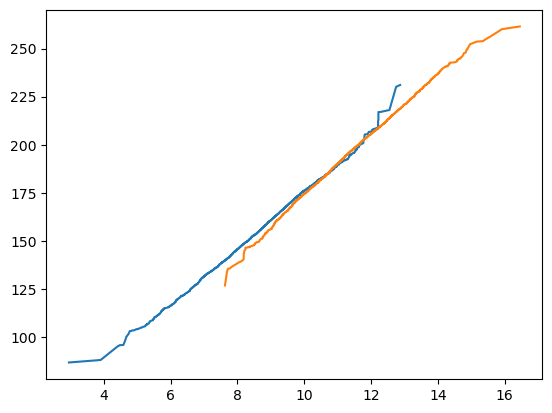

In [4]:
import matplotlib.pyplot as plt

plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)

# O coeficiente das retas

As duas parecem ter uma inclinação muito parecida em uma primeira inspeção visual vamos determinar os coeficientes da reta para cada um dos casos.

Lembre que para o coeficiente angular precisamos implementar a função:
$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$

e para o coeficiente linear:
$$ \hat{b} = Media(Y_i) - \hat{a} * Media(X_i) $$


Perceba que nesse caso o X é o diâmtro e o Y é o peso. Além disso o n é o número de elementos dentro do X, por exemplo.Ele vai ser diferente para a laranja e toranja. Determine o coefiecente para cada caso:

In [5]:
Y = peso_laranja
X = diametro_laranja
n = np.size(X)

In [6]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
a

14.7997452319846

In [7]:
b = np.mean(Y) - a*np.mean(X)
b

27.38560381218413

In [8]:
Yt = peso_toranja
Xt = diametro_toranja
nt = np.size(Xt)

In [9]:
c = (nt*np.sum(Xt*Yt) - np.sum(Xt)*np.sum(Yt))/(nt*np.sum(Xt**2)-np.sum(Xt)**2)
c

15.70884459360376

In [10]:
d = np.mean(Yt) - c*np.mean(Xt)
d

17.007102876817726

# Extra - Gráfico de Comparação Laranja vs Toranja #

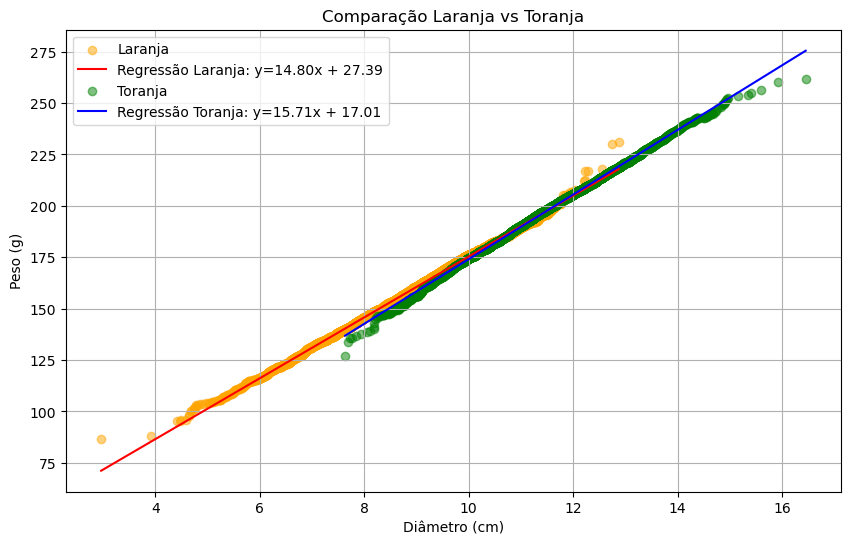

In [11]:
# Calcular pontos da reta da laranja
x_reg = np.linspace(min(diametro_laranja), max(diametro_laranja), 100)
y_reg = a * x_reg + b

# Calcular pontos da reta da toranja
xt_reg = np.linspace(min(diametro_toranja), max(diametro_toranja), 100)
yt_reg = c * xt_reg + d

# Dois gráficos juntos para comparar
plt.figure(figsize=(10,6))

# Laranja
plt.scatter(diametro_laranja, peso_laranja, color='orange', alpha=0.5, label='Laranja')
plt.plot(x_reg, y_reg, color='red', label=f'Regressão Laranja: y={a:.2f}x + {b:.2f}')

# Toranja
plt.scatter(diametro_toranja, peso_toranja, color='green', alpha=0.5, label='Toranja')
plt.plot(xt_reg, yt_reg, color='blue', label=f'Regressão Toranja: y={c:.2f}x + {d:.2f}')

plt.xlabel("Diâmetro (cm)")
plt.ylabel("Peso (g)")
plt.title("Comparação Laranja vs Toranja")
plt.legend()
plt.grid(True)
plt.show()

# Estimando através de números aleatórios

Agora ao invés de usar a fórmula fechada utilize a np.random.uniform para gerar valores aleatórios para determinar o coeficiente angular da toranja. Nesse caso vamos assumir que b é igual a 17. Utilize o random.seed(84).

In [12]:
b =17

In [13]:
norma = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma = np.append(norma,np.linalg.norm(Y- (coef_angulares[i]*X+b)))

In [14]:
norma

array([8856.43555923, 2965.7067987 , 5289.6705558 , 1734.02010579,
       8303.40020629, 7319.9773923 , 6538.5555502 , 4999.02697864,
       2091.4471608 , 7312.14791917, 4415.14472694,  700.30995733,
       7883.5032911 , 4289.06273091, 2157.10668452,  124.90062348,
       6430.12215427, 6022.56908374, 7402.44741046, 7769.83714738,
       1457.47467874, 6447.66673324, 8345.11729062, 8409.215505  ,
       3219.39412319, 5566.04507227, 1907.97717376, 5883.75125593,
       8091.08422333, 7177.80927703,  380.85240501, 4846.03337764,
       4029.23235841, 3678.50443037, 7042.97877975, 5225.97959212,
       6765.19059435,  645.958023  , 3677.90296679, 6152.35201175,
       7033.95393852, 2791.11389048, 8385.34280504, 4518.57861037,
        609.40651346, 7506.79948258, 8905.10414661, 6824.53106715,
       1826.29821292, 2839.07618408, 8599.55186446, 1667.97624922,
        835.16987189, 2212.72471994, 1490.54711199,  370.25985486,
       7298.62000652, 4888.19302449, 9371.85905419, 3003.34113

In [15]:
np.min(norma)

124.90062348267885

Algo que não foi passado no curso é que também podemos utilizar condições dentro dos colchetes dos arrays para encontrar um determinado valor. O código abaixo mostra o coeficiente angular que corresponde ao menor valor da norma. Repare que a condição é a: norma == np.min(norma).

In [16]:
coef_angulares[norma == np.min(norma)]

array([16.06838693])